In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [177]:
data = pd.read_csv("C:\\Users\\wajit\\Downloads\\2017-2022.csv")

In [178]:
data.describe()

,Latitude,Longitude,Kedalaman (km),Magnitude
count,6149.000000,6149.000000,6149.000000,6149.000000
mean,-8.879588,111.311699,30.002895,3.142739
std,0.838015,1.396364,51.434214,0.670986
min,-12.690000,108.200000,1.000000,0.900000
25%,-9.300000,110.370000,10.000000,2.800000
50%,-8.881300,111.070000,14.000000,3.100000
75%,-8.430000,112.720000,29.000000,3.500000
max,0.767800,114.000000,715.000000,6.600000


In [179]:
tanggal = data["Tanggal"]
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [180]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [181]:
gempa_semua = np.array(gempa_semua)

In [182]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -9.28   113.87    10.    ]
 [ -9.04   112.87    10.    ]
 ...
 [ -8.8896 112.4811  41.    ]
 [-10.4633 113.1895  10.    ]
 [ -8.8052 109.5594  29.    ]]


In [183]:
magnitude = magnitude.astype('float64')

In [184]:
magnitude.dtype

dtype('float64')

In [185]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.3, random_state=42)

In [186]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                256       
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 32)                4128      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 2)                

In [187]:
optimizer = Adam(learning_rate=0.000001)

In [188]:
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [189]:
history = model.fit(X_train, y_train, batch_size=64, epochs=3000, verbose=1, validation_data=(X_test, y_test))

Epoch 1/3000
68/68 [==============================] - 1s 3ms/step - loss: 10.9261 - mean_absolute_error: 3.0336 - val_loss: 9.9035 - val_mean_absolute_error: 2.8974
Epoch 2/3000
68/68 [==============================] - 0s 2ms/step - loss: 10.8121 - mean_absolute_error: 3.0217 - val_loss: 9.8412 - val_mean_absolute_error: 2.8916
Epoch 3/3000
68/68 [==============================] - 0s 2ms/step - loss: 10.7127 - mean_absolute_error: 3.0122 - val_loss: 9.7792 - val_mean_absolute_error: 2.8853
Epoch 4/3000
68/68 [==============================] - 0s 2ms/step - loss: 10.6350 - mean_absolute_error: 3.0051 - val_loss: 9.7176 - val_mean_absolute_error: 2.8791
Epoch 5/3000
68/68 [==============================] - 0s 2ms/step - loss: 10.5636 - mean_absolute_error: 2.9954 - val_loss: 9.6540 - val_mean_absolute_error: 2.8724
Epoch 6/3000
68/68 [==============================] - 0s 2ms/step - loss: 10.3466 - mean_absolute_error: 2.9803 - val_loss: 9.5939 - val_mean_absolute_error: 2.8658
Epoch 7/30

In [190]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy: ", accuracy)

58/58 [==============================] - 0s 698us/step - loss: 0.8989 - mean_absolute_error: 0.7748
Accuracy:  0.7748048305511475


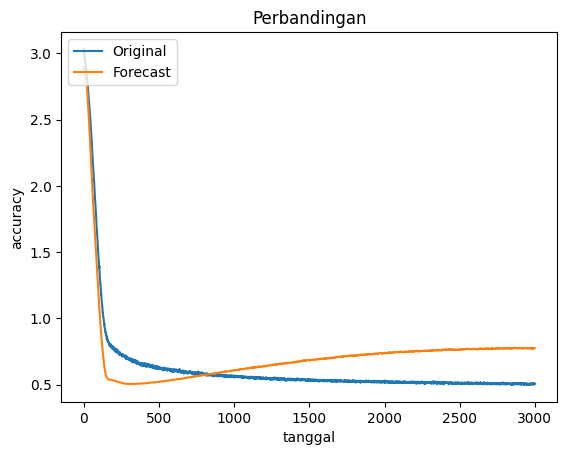

In [191]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Perbandingan')
plt.ylabel('accuracy')
plt.xlabel('tanggal')
plt.legend(['Original', 'Forecast'], loc='upper left')
plt.show()

In [192]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [193]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {[0][0]} Mg".format(prediksi_gempa))